In [45]:
# Imports
from pycoingecko import CoinGeckoAPI
import pandas as pd
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
# initilize client
client = CoinGeckoAPI()
client.ping()

{'gecko_says': '(V3) To the Moon!'}

In [46]:
def monte_carlo(df, coin_name):
    returns = df["price"].pct_change()
    last_price = df["price"].iloc[-1]
    number_simulations = 1000
    number_days = 159
    simulation_df = pd.DataFrame()
    for x in range(number_simulations):
        count = 0
        daily_volatility = returns.std()
        
        price_series = []
        
        price = last_price * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
            
        for y in range(number_days):
            if count == 158:
                break
            price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
            price_series.append(price)
            count +=1
        simulation_df[x] = price_series
    
    
    fig = plt.figure(figsize=(15,9))
    plt.plot(simulation_df)
    plt.axhline(y = last_price, color = 'r', linestyle = '-')
    plt.title("Monte Carlo Simulation " + coin_name,  fontsize = 34)
    plt.xlabel('Day')
    plt.ylabel('Price - USD')
    plt.show()

In [47]:
def main():
    # Helper Functions
    def unix_time(year, month, day, hour, second):
        date_time = datetime.datetime(year, month, day, hour, second)
        return time.mktime(date_time.timetuple())

    def human_time(unix_time):
        return datetime.datetime.fromtimestamp(unix_time)
    
    start = unix_time(2018, 1, 1, 0, 0)
    end = unix_time(2023, 1, 1, 0, 0)
    
    # Getting input for specific coins/ dates
    coin1 = input("What is the first coin you would like to compare")
    coin2 = input("What is the second coin you would like to compare")
    coin1 = coin1.lower()
    coin2 = coin2.lower()
    
    # Reading in specified dates from API
    user_coin1 = client.get_coin_market_chart_range_by_id(
    id = coin1,
    vs_currency = 'usd',
    from_timestamp=start,
    to_timestamp=end)
    
    user_coin2 = client.get_coin_market_chart_range_by_id(
    id = coin2,
    vs_currency = 'usd',
    from_timestamp=start,
    to_timestamp=end)
    
    # Making dataframes from API
    coin1_df = pd.DataFrame.from_dict(user_coin1)
    coin2_df= pd.DataFrame.from_dict(user_coin2)
    
    # Cleaning Coin1Data
    coin1_df['date'] = coin1_df['prices'][0][0]
    coin1_df[['time', 'price']] = coin1_df['prices'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin1_df[['time2', 'market_cap']] = coin1_df['market_caps'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin1_df[['time3', 'total_volume']] = coin1_df['total_volumes'].apply(lambda x: pd.Series([x[0], x[1]]))
    
    coin1_df.drop('prices', axis=1, inplace=True)
    coin1_df.drop('market_caps', axis=1, inplace=True)
    coin1_df.drop('total_volumes', axis=1, inplace=True)
    coin1_df.drop('date', axis=1, inplace=True)
    coin1_df.drop('time2', axis=1, inplace=True)
    coin1_df.drop('time3', axis=1, inplace=True)
    
    coin1_df['time'] = pd.to_datetime(coin1_df['time'], unit='ms')
    
    #Cleaning Coin2 Data
    coin2_df['date'] = coin2_df['prices'][0][0]
    coin2_df[['time', 'price']] = coin2_df['prices'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin2_df[['time2', 'market_cap']] = coin2_df['market_caps'].apply(lambda x: pd.Series([x[0], x[1]]))
    coin2_df[['time3', 'total_volume']] = coin2_df['total_volumes'].apply(lambda x: pd.Series([x[0], x[1]]))
    
    coin2_df.drop('prices', axis=1, inplace=True)
    coin2_df.drop('market_caps', axis=1, inplace=True)
    coin2_df.drop('total_volumes', axis=1, inplace=True)
    coin2_df.drop('date', axis=1, inplace=True)
    coin2_df.drop('time2', axis=1, inplace=True)
    coin2_df.drop('time3', axis=1, inplace=True)
    
    #SImulation
    monte_carlo(coin1_df, coin1)
    monte_carlo(coin2_df, coin1)
    
    #print(simulation_df)

What is the first coin you would like to compare bitcoin
What is the second coin you would like to compare dogecoin


C:\Users\edorion\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


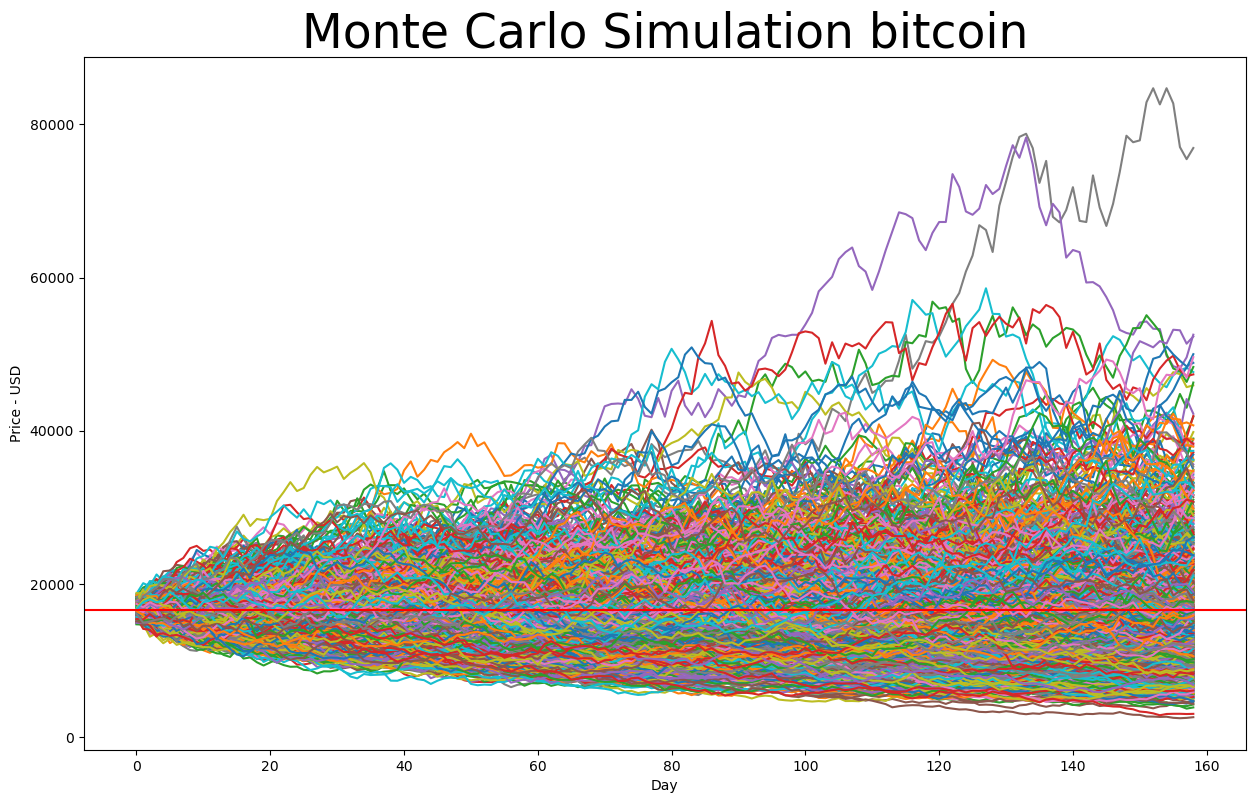

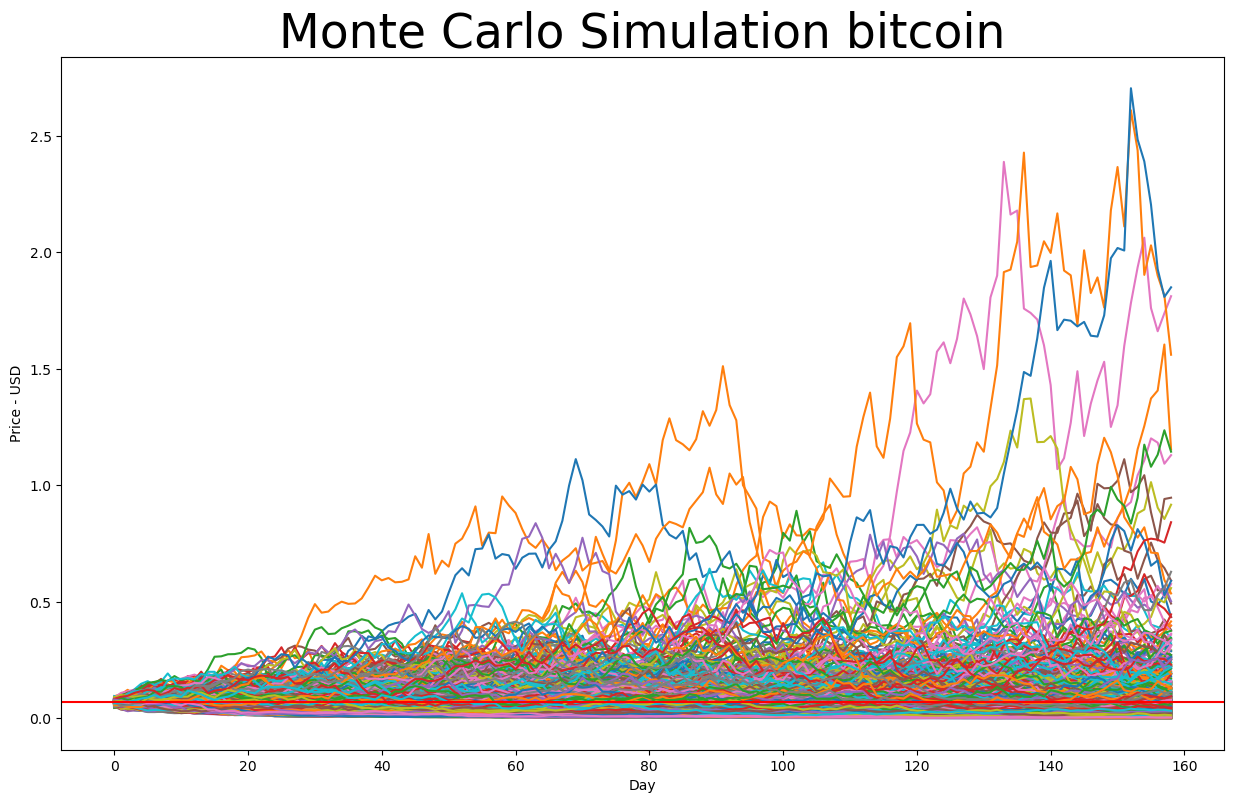

In [48]:
main()